# Q2. Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

 - Variable Name -  Variable Description 
 - PassengerID - Passenger ID          
 - Survived - Survival (0 = No;1 = Yes)
 - Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
 - Name	- Name
 - Sex - Sex
 - Age - Age
 - SibSp - Number of Siblings/Spouses Aboard
 - Parch - Number of Parents/Children Aboard
 - Ticket - Ticket Number 
 - Fare - Passenger Fare
 - Cabin - Cabin 
 - Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

## Import Libraries
Import all necessary libraries


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay

import numpy as np

Our target variable will be Survived.  Use the rest of the fields mentioned above to predict whether a passenger survived the Titanic shipwreck.

### b.	Data Loading / Preprocessing
#### i.	Loading
1. Load the data <df_train.csv> and <df_test.csv> as a pandas dataframe using the ‘pandas.read_csv’ function. The ‘df_test.csv’ has been preprocessed (I.e., null values have been dropped, certain columns etc. have been dropped) and should not be changed apart from splitting the the dataframe into X_test and y_test.  The ‘df_train’ data has NOT been preprocessed and you will need to preprocess and prepare the ‘df_train’ dataframe. Note: Neither df_train nor df_test have been scaled.  The next few steps will enumerate data preprocessing, scaling requirements we need to perform.

In [2]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

2. The resulting dataframe (I.e., df_train) should have the shape (712,12) indicating that there are 712 instances and 12 columns.

In [3]:
df_train.shape

(712, 12)

3. In df_train, dataframe, currently you have 12 columns which are the following – PassengerID, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked and the Survived column (target variable).

In [4]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,1
1,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
2,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,0
3,542,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,0
4,557,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,1


4. Use the ‘pandas.isnull().sum()’ function check if there are any missing values in the df_train dataframe. Report which columns have missing (i.e., null) values and provide the number of the null values in the columns.

In [5]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

5. Use the ‘pandas.DataFrame.drop()’ function to drop the ‘Cabin’, ‘PassengerID’, ‘Name’ and ‘Ticket’ columns. 

In [6]:
df_train = df_train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,NaN,0,0,30.5000,S,1
1,3,female,27.0,0,2,11.1333,S,1
2,2,male,NaN,0,0,0.0000,S,0
3,3,female,9.0,4,2,31.2750,S,0
4,1,female,48.0,1,0,39.6000,C,1


6. Use the ‘pandas.DataFrame.fillna()’ function to replace the NA values in the ‘Age’ column with the mean value of the ‘Age’ column. Note: This process is called `imputation` (i.e., filling null values with a pre-specified value) and we are employing one strategy called mean imputation, but other strategies can also be employed in general.  
Use the ‘dropna()’ function to drop any remaining rows that consist of NA values.

In [7]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train.dropna(inplace=True)

In [8]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,male,29.811847,0,0,30.5000,S,1
1,3,female,27.000000,0,2,11.1333,S,1
2,2,male,29.811847,0,0,0.0000,S,0
3,3,female,9.000000,4,2,31.2750,S,0
4,1,female,48.000000,1,0,39.6000,C,1
...,...,...,...,...,...,...,...,...
707,3,male,19.000000,0,0,14.5000,S,0
708,2,male,18.000000,0,0,11.5000,S,0
709,1,male,17.000000,0,2,110.8833,C,1
710,3,male,28.500000,0,0,7.2292,C,0


7. Your task is to use the feature columns to predict the target column. This can be cast as a classification problem.  
8. Create a pandas dataframe X_train of features (by dropping the ‘Survival’ column from the df_train dataframe). Create a pandas Series object of targets y_train (by only considering the ‘Survival’ column from the df_train dataframe). Moving forward, we will be working with X_train and y_train. At this point also split the df_test into X_test and y_test by dropping the ‘Survival’ column and storing the features into X_test. Store the ‘Survival’ column in y_test.

In [9]:
# For df_train
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

# For df_test
X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

#### ii. Data Visualization

1. Using matplotlib employ a scatter plot using ‘matplotlib.pyplot.scatter’ between the age of the passengers and the price of their fare. Label the x-axis and the y-axis along with the giving the plot a title.

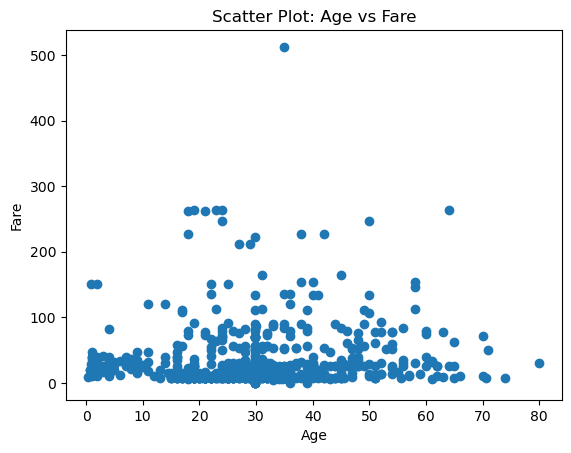

In [10]:
plt.scatter(df_train['Age'], df_train['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.show()

2. **Only for this question** use the df_train dataframe. Using matplotlib visualize the number of males and females that survived and their respective passenger classes on two separate bar chart plots using ‘matplotlib.pyplot.bar’ (Passenger Class column). 

Text(0, 0.5, 'Number of Females Survived')

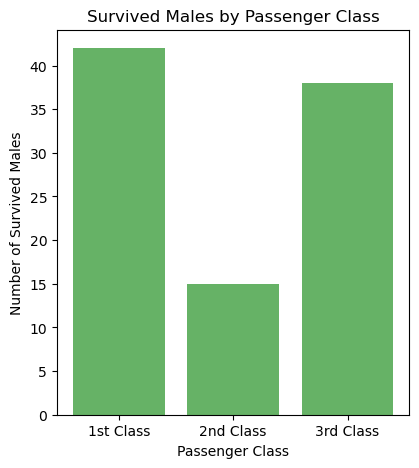

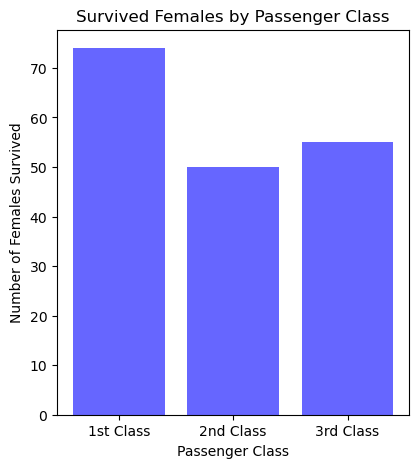

In [11]:
survived_male = df_train[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]
survived_male_count = survived_male['Pclass'].value_counts().sort_index()

survived_female = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]
survived_female_count = survived_female['Pclass'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['1st Class', '2nd Class', '3rd Class'],survived_male_count.values, color='green', alpha=0.6)
plt.title('Survived Males by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survived Males')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['1st Class', '2nd Class', '3rd Class'],survived_female_count.values, color='blue', alpha=0.6)
plt.title('Survived Females by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Females Survived')

3. Using the Target variable (Survived) in y_train plot a bar chart showing the distribution of the ‘Survived’ column. 

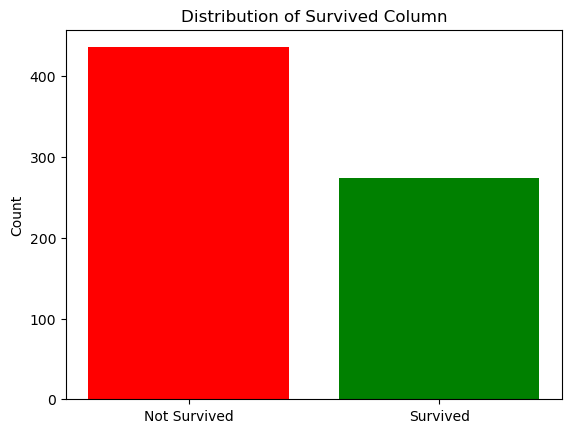

In [12]:
survived_counts = y_train.value_counts()

plt.bar(['Not Survived', 'Survived'], survived_counts, color=['red', 'green'])
plt.ylabel('Count')
plt.title('Distribution of Survived Column')

plt.show()

4. So far you should have successfully been able to load, preprocess and visualize your data. Use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Sex’ and ‘Embarked’). Make sure to pass `drop_first=True` to the `get_dummies()` function. (Perform this only on X_train store the result back into X_train). 

In [13]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,29.811847,0,0,30.5000,1,0,1
1,3,27.000000,0,2,11.1333,0,0,1
2,2,29.811847,0,0,0.0000,1,0,1
3,3,9.000000,4,2,31.2750,0,0,1
4,1,48.000000,1,0,39.6000,0,0,0
...,...,...,...,...,...,...,...,...
707,3,19.000000,0,0,14.5000,1,0,1
708,2,18.000000,0,0,11.5000,1,0,1
709,1,17.000000,0,2,110.8833,1,0,0
710,3,28.500000,0,0,7.2292,1,0,0


#### iii. Data Scaling

1. Employ X_train and MinMaxScaler only on the continuous attributes. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the data. Store the scaled values in X_train again. 

In [14]:
continuous_cols = ['Age','Fare','SibSp','Parch','Pclass']

scaler = MinMaxScaler()

X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

2. Scale the X_test using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, all scaled according to the MinMaxScaler.

In [15]:
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.5,0.623021,0.0,0.166667,0.050749,0,0,1
1,0.0,0.547625,0.0,0.000000,0.054107,0,0,0
2,1.0,0.362113,0.0,0.000000,0.015379,0,1,0
3,1.0,0.057552,0.0,0.000000,0.024350,0,0,1
4,0.5,0.258608,0.0,0.000000,0.143462,1,0,1
...,...,...,...,...,...,...,...,...
174,0.0,0.258608,0.0,0.000000,0.152164,0,0,1
175,1.0,0.362113,0.0,0.000000,0.016510,1,1,0
176,1.0,0.107816,0.0,0.333333,0.040062,1,0,1
177,1.0,0.362113,0.0,0.000000,0.013761,1,0,1


### c. Modelling

#### i. Modelling (Model Instantiation / Training) using Logistic Regression classifier

1. Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’  

In [16]:
model_lr = LogisticRegression()

2. Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [17]:
model_lr.fit(X_train,y_train)

LogisticRegression()

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [18]:
y_pred_lr = model_lr.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [19]:
accuracy_lr = accuracy_score(y_test,y_pred_lr)
accuracy_lr

0.888268156424581

In [20]:
print("The accuracy of the Model is ",accuracy_lr*100,"%")

The accuracy of the Model is  88.8268156424581 %


#### ii. Modelling (Model Instantiation / Training) using Support Vector Machine Classifier

1. Employ the Support Vector Machine (SVM) classifier from sklearn () and instantiate the model. Make sure to set `probability=True` when creating the model. Label this model as ‘model_svm’

In [21]:
model_svm = SVC(probability=True,kernel = 'linear')

2. Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [22]:
model_svm.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

3. Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [23]:
y_pred_svm = model_svm.predict(X_test)

4. Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model. 

In [24]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.8659217877094972

In [25]:
print("The accuracy of the Model is ",accuracy_svm*100,"%")

The accuracy of the Model is  86.59217877094973 %


#### iii. Modelling Logistic Regression Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_40`, `df_train_60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20` we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable.

**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise level datasets.**  
Train a new Logistic Regression model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_lr_noise_<nl>`. Specifically, do the following:
1. Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as `model_lr_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data.
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_lr_noise<nl>`.
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model.

In [26]:
df_train_noise20 = pd.read_csv("df_train_noise20.csv")
df_train_noise20.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,0.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,1.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,1.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,1.0


In [27]:
X_train_20 = df_train_noise20.drop("Survived",axis=1)
y_train_20 = df_train_noise20["Survived"]

In [28]:
X_train_20

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
705,1.0,0.233476,0.000,0.000000,0.028302,1.0,0.0,1.0
706,0.5,0.220910,0.000,0.000000,0.022447,1.0,0.0,1.0
707,0.0,0.208344,0.000,0.333333,0.216430,1.0,0.0,0.0
708,1.0,0.352852,0.000,0.000000,0.014110,1.0,0.0,0.0


In [29]:
y_train_20

0      0.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
705    0.0
706    0.0
707    1.0
708    0.0
709    0.0
Name: Survived, Length: 710, dtype: float64

In [30]:
model_lr_noise20 = LogisticRegression()
model_lr_noise20.fit(X_train_20,y_train_20)

LogisticRegression()

In [31]:
y_pred_lr_noise20 = model_lr_noise20.predict(X_test)

In [32]:
accuracy_noise20 = accuracy_score(y_test,y_pred_lr_noise20)
accuracy_noise20

0.8435754189944135

In [33]:
print("The accuracy of Logistic Regression Model for noise20 data is  ",accuracy_noise20*100,"%")

The accuracy of Logistic Regression Model for noise20 data is   84.35754189944134 %


In [34]:
df_train_noise40 = pd.read_csv("df_train_noise40.csv")
df_train_noise40.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,0.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,0.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,0.0


In [35]:
X_train_40 = df_train_noise40.drop("Survived",axis=1)
y_train_40 = df_train_noise40["Survived"]

In [36]:
X_train_40

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
705,1.0,0.233476,0.000,0.000000,0.028302,1.0,0.0,1.0
706,0.5,0.220910,0.000,0.000000,0.022447,1.0,0.0,1.0
707,0.0,0.208344,0.000,0.333333,0.216430,1.0,0.0,0.0
708,1.0,0.352852,0.000,0.000000,0.014110,1.0,0.0,0.0


In [37]:
y_train_40

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
705    0.0
706    1.0
707    0.0
708    0.0
709    0.0
Name: Survived, Length: 710, dtype: float64

In [38]:
model_lr_noise40 = LogisticRegression()
model_lr_noise40.fit(X_train_40,y_train_40)

LogisticRegression()

In [39]:
y_pred_lr_noise40 = model_lr_noise40.predict(X_test)
accuracy_noise40 = accuracy_score(y_test,y_pred_lr_noise40)
accuracy_noise40

0.7653631284916201

In [40]:
print("The accuracy of Logistic Regression Model for noise40 data is  ",accuracy_noise40*100,"%")

The accuracy of Logistic Regression Model for noise40 data is   76.53631284916202 %


In [41]:
df_train_noise60 = pd.read_csv("df_train_noise60.csv")
df_train_noise60.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,0.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,1.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,0.0


In [42]:
X_train_60 = df_train_noise60.drop("Survived",axis=1)
y_train_60 = df_train_noise60["Survived"]

In [43]:
model_lr_noise60 = LogisticRegression()
model_lr_noise60.fit(X_train_60,y_train_60)

LogisticRegression()

In [44]:
y_pred_lr_noise60 = model_lr_noise60.predict(X_test)
accuracy_noise60 = accuracy_score(y_test,y_pred_lr_noise60)
accuracy_noise60

0.6089385474860335

In [45]:
print("The accuracy of Logistic Regression Model for noise60 data is  ",accuracy_noise60*100,"%")

The accuracy of Logistic Regression Model for noise60 data is   60.893854748603346 %


#### iv. Modelling Support Vector Machine (SVM) Classifier with the addition of noise on the target variable.

In the data repository you should see three noisy datasets – `df_train_noise20`, `df_train_40`, `df_train_60`. These datasets have already been preprocessed. In each dataset `df_train_noise<integer>`, the integer indicates the percentage of noise injected into the target variable in that training set. The noise can be considered a result of incorrect class labelling of a particular instance. For example, in `df_train_noise20`, 20% of the instances have an incorrect target label in the training set. Our goal will be to train a set of classification models on such noisy training data and test on a clean test set (i.e., same as what we have been using so far `df_test`).  

Load the `df_train_noise<nl>` (nl means noise level and is a place holder for the integer percentage) datasets and split the data into `X_train_<nl>` and `y_train_<nl>` (e.g., if working with `df_train_noise20`’ we would split the data and store it in variables named `X_train_20`, `y_train_20`). `X_train_<nl>` should store the features and `y_train_<nl>` should store the target variable. 
     
**Repeat the following steps (1 – 4) for the 20%, 40%, 60% noise datasets.**
Train a new SVM classification model on the new training and use the pre-existing `X_test` and `y_test` to evaluate your model. Label this model as `model_svm_noise_<nl>`.  Specifically, do the following:
1. Employ a new SVM classifier from sklearn and instantiate the model. Label this model as `model_svm_noise<nl>`
2. Once instantiated, `fit()` the model using the `X_train_<nl>` and `y_train_<nl>` data. 
3. Employ the `predict()` function to obtain predictions on `X_test` and store this in a variable labeled as `y_pred_svm_noise<nl>`.  
4. Employ the `accuracy_score` function and print the accuracy of the new Logistic Regression model. 

In [46]:
df_train_noise20.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,0.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,1.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,1.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,1.0


In [47]:
X_train_20.head()
y_train_20.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: Survived, dtype: float64

In [48]:
model_svm_noise20 = SVC()
model_svm_noise20.fit(X_train_20,y_train_20)

SVC()

In [49]:
y_pred_svm_noise20 = model_svm_noise20.predict(X_test)
accuracy_svm_noise20 = accuracy_score(y_test,y_pred_svm_noise20)
accuracy_svm_noise20

0.8324022346368715

In [50]:
print("The accuracy of SVM Model for noise20 data is  ",accuracy_svm_noise20*100,"%")

The accuracy of SVM Model for noise20 data is   83.24022346368714 %


In [51]:
df_train_noise40.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,0.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,0.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,0.0


In [52]:
X_train_40.head()
y_train_40.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Survived, dtype: float64

In [53]:
model_svm_noise40 = SVC()
model_svm_noise40.fit(X_train_40,y_train_40)

SVC()

In [54]:
y_pred_svm_noise40 = model_svm_noise40.predict(X_test)
accuracy_svm_noise40 = accuracy_score(y_test,y_pred_svm_noise40)
accuracy_svm_noise40

0.8547486033519553

In [55]:
print("The accuracy of SVM Model for noise40 data is  ",accuracy_svm_noise40*100,"%")

The accuracy of SVM Model for noise40 data is   85.47486033519553 %


In [56]:
df_train_noise60.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,0.0,0.369337,0.000,0.000000,0.059532,1.0,0.0,1.0,1.0
1,1.0,0.334004,0.000,0.333333,0.021731,0.0,0.0,1.0,0.0
2,0.5,0.369337,0.000,0.000000,0.000000,1.0,0.0,1.0,1.0
3,1.0,0.107816,0.500,0.333333,0.061045,0.0,0.0,1.0,0.0
4,0.0,0.597889,0.125,0.000000,0.077294,0.0,0.0,0.0,0.0


In [57]:
X_train_60.head()
y_train_60.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Survived, dtype: float64

In [58]:
model_svm_noise60 = SVC()
model_svm_noise60.fit(X_train_60,y_train_60)

SVC()

In [59]:
y_pred_svm_noise60 = model_svm_noise60.predict(X_test)
accuracy_svm_noise60 = accuracy_score(y_test,y_pred_svm_noise60)
accuracy_svm_noise60

0.6312849162011173

In [60]:
print("The accuracy of SVM Model for noise60 data is  ",accuracy_svm_noise60*100,"%")

The accuracy of SVM Model for noise60 data is   63.128491620111724 %


### d. Evaluation

#### i. Report F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1. Employ a `classification_report()` function from sklearn.metrics to report the precision recall and f1 score for each class for the `model_lr` model and the `model_svm` along with a confusion matrix for each of them. 

In [61]:
#Classification report and Confustion Matrix for Logistic Regression Model
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
print('Classification Report for Logistic Regression Model')
print(classification_report(y_test, y_pred_lr))

[[105   8]
 [ 12  54]]
Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       113
           1       0.87      0.82      0.84        66

    accuracy                           0.89       179
   macro avg       0.88      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



In [62]:
#Classification report and Confustion Matrix for SVM Model
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
print('Classification Report for SVM Model')
print(classification_report(y_test, y_pred_svm))

[[103  10]
 [ 14  52]]
Classification Report for SVM Model
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       113
           1       0.84      0.79      0.81        66

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.87      0.86       179



#### ii. Report the accuracy and classification report for each of the three noisy models (`model_lr_noise<nl>`, `model_svm_noise<nl>`). 

In [63]:
#Classification report and Confustion Matrix for LR Model with 20% noise
cm = confusion_matrix(y_test, y_pred_lr_noise20)
print(cm)
print('Classification Report for LR Model with 20% noise')
print(classification_report(y_test, y_pred_lr_noise20))

[[104   9]
 [ 19  47]]
Classification Report for LR Model with 20% noise
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.84      0.71      0.77        66

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [64]:
#Classification report and Confustion Matrix for LR Model with 40% noise
cm = confusion_matrix(y_test, y_pred_lr_noise40)
print(cm)
print('Classification Report for LR Model with 40% noise')
print(classification_report(y_test, y_pred_lr_noise40))

[[110   3]
 [ 39  27]]
Classification Report for LR Model with 40% noise
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       113
           1       0.90      0.41      0.56        66

    accuracy                           0.77       179
   macro avg       0.82      0.69      0.70       179
weighted avg       0.80      0.77      0.74       179



In [65]:
#Classification report and Confustion Matrix for LR Model with 60% noise
cm = confusion_matrix(y_test, y_pred_lr_noise60)
print(cm)
print('Classification Report for LR Model with 60% noise')
print(classification_report(y_test, y_pred_lr_noise60))

[[82 31]
 [39 27]]
Classification Report for LR Model with 60% noise
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       113
           1       0.47      0.41      0.44        66

    accuracy                           0.61       179
   macro avg       0.57      0.57      0.57       179
weighted avg       0.60      0.61      0.60       179



In [66]:
#Classification report and Confustion Matrix for SVM Model with 20% noise
cm = confusion_matrix(y_test, y_pred_svm_noise20)
print(cm)
print('Classification Report for SVM Model with 20% noise')
print(classification_report(y_test, y_pred_svm_noise20))

[[113   0]
 [ 30  36]]
Classification Report for SVM Model with 20% noise
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       113
           1       1.00      0.55      0.71        66

    accuracy                           0.83       179
   macro avg       0.90      0.77      0.79       179
weighted avg       0.87      0.83      0.82       179



In [67]:
#Classification report and Confustion Matrix for SVM Model with 40% noise
cm = confusion_matrix(y_test, y_pred_svm_noise40)
print(cm)
print('Classification Report for SVM Model with 40% noise')
print(classification_report(y_test, y_pred_svm_noise40))

[[111   2]
 [ 24  42]]
Classification Report for SVM Model with 40% noise
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       113
           1       0.95      0.64      0.76        66

    accuracy                           0.85       179
   macro avg       0.89      0.81      0.83       179
weighted avg       0.87      0.85      0.85       179



In [68]:
#Classification report and Confustion Matrix for SVM Model with 60% noise
cm = confusion_matrix(y_test, y_pred_svm_noise60)
print(cm)
print('Classification Report for SVM Model with 60% noise')
print(classification_report(y_test, y_pred_svm_noise60))

[[92 21]
 [45 21]]
Classification Report for SVM Model with 60% noise
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       113
           1       0.50      0.32      0.39        66

    accuracy                           0.63       179
   macro avg       0.59      0.57      0.56       179
weighted avg       0.61      0.63      0.61       179



#### iii. Make a calibration plot for each of the models without noisy data (`model_lr`, `model_svm`).

Use the CalibrationDisplay class from sklearn.calibration to make your plot.

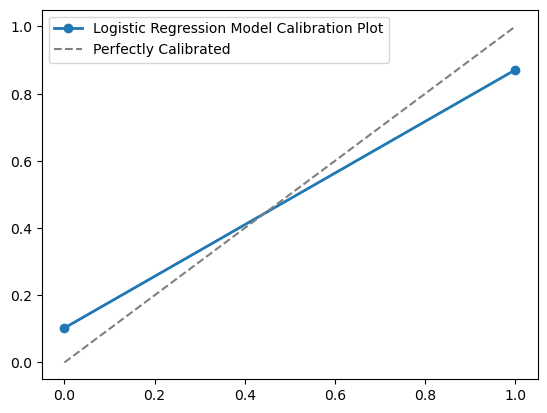

In [69]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
true_pos, pred_pos = calibration_curve(y_test, y_pred_lr, n_bins=10)
plt.plot(pred_pos,
         true_pos, 
         marker='o', 
         linewidth=2, 
         label='Logistic Regression Model Calibration Plot')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.legend(loc='best')
plt.show()

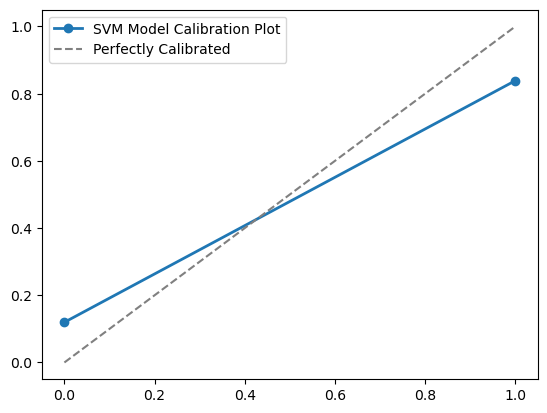

In [70]:
true_pos, pred_pos = calibration_curve(y_test, y_pred_svm, n_bins=10)
plt.plot(pred_pos,
         true_pos, 
         marker='o', 
         linewidth=2, 
         label='SVM Model Calibration Plot')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.legend(loc='best')
plt.show()